In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [73]:
df_atlanta= pd.read_csv('muon001_hourly_alldata.csv',sep='\s+')
#combine index with timestamp column to get a datetime index
df_atlanta.index = df_atlanta.index + ' ' + df_atlanta['timestamp']
#drop the timestamp column
df_atlanta.drop(columns=['timestamp'], inplace=True)
df_atlanta.index = pd.to_datetime(df_atlanta.index)
#only keep datetimes after 2023-01-01
df_atlanta = df_atlanta[df_atlanta.index > '2023-01-01']
df_atlanta.head(40)

,Ch12,Ch13,Ch23,mslp,tmpf,press_pct,temp_pct,temp_scaled,Ch12_pct,Ch13_pct,Ch23_pct,Ch12_m_avg,Ch13_m_avg,Ch23_m_avg,delta_Ch12,delta_Ch13,delta_Ch23,delta_pres
2023-01-01 01:00:00+00:00,10010,4920,9785,1016.9,57.0,-0.407508,-5.581869,-0.558187,-3.465241,-4.302658,-3.868398,-1.894904,-2.373799,-2.303046,-0.035267,-0.043980,-0.039452,-2.076205
2023-01-01 02:00:00+00:00,10095,4873,9768,1017.3,55.9,-0.328998,-7.403973,-0.740397,-2.645515,-5.216840,-4.035413,-2.201899,-3.129134,-2.700934,-0.026811,-0.053578,-0.041191,-1.676205
2023-01-01 03:00:00+00:00,10080,4958,9709,1017.4,55.9,-0.309370,-7.403973,-0.740397,-2.790173,-3.563532,-4.615051,-2.444602,-3.236113,-2.926895,-0.028298,-0.036286,-0.047249,-1.576205
2023-01-01 04:00:00+00:00,9878,4871,9744,1017.2,55.9,-0.348625,-7.403973,-0.740397,-4.738227,-5.255741,-4.271198,-3.153424,-4.241064,-3.614602,-0.048542,-0.053989,-0.043651,-1.776205
2023-01-01 05:00:00+00:00,9907,4775,9573,1016.9,55.9,-0.407508,-7.403973,-0.740397,-4.458556,-7.123007,-5.951168,-3.534355,-4.869970,-4.235175,-0.045610,-0.073894,-0.061356,-2.076205
2023-01-01 06:00:00+00:00,10007,4820,9668,1017.0,57.0,-0.387880,-5.581869,-0.558187,-3.494173,-6.247726,-5.017851,-3.598647,-5.284917,-4.626513,-0.035567,-0.064514,-0.051481,-1.976205
2023-01-01 07:00:00+00:00,9823,4731,9630,1017.2,55.0,-0.348625,-8.894786,-0.889479,-5.268638,-7.978836,-5.391178,-3.899213,-5.897614,-4.880310,-0.054125,-0.083152,-0.055419,-1.776205
2023-01-01 08:00:00+00:00,9823,4794,9641,1017.6,55.0,-0.270115,-8.894786,-0.889479,-5.268638,-6.753444,-5.283110,-4.336401,-6.153714,-5.088259,-0.054125,-0.069923,-0.054278,-1.376205
2023-01-01 09:00:00+00:00,9957,4903,9783,1017.6,54.0,-0.270115,-10.551244,-1.055124,-3.976364,-4.633320,-3.888047,-4.534099,-6.332012,-4.967092,-0.040576,-0.047441,-0.039656,-1.376205
2023-01-01 10:00:00+00:00,9866,4822,9646,1017.8,54.0,-0.230860,-10.551244,-1.055124,-4.853953,-6.208825,-5.233988,-4.553387,-6.490860,-5.127557,-0.049757,-0.064099,-0.053759,-1.176205


In [78]:
mean = df_atlanta['Ch13'].mean()
min = df_atlanta['Ch13'].min()
max = df_atlanta['Ch13'].max()
value = (max - min) / mean
print('value',value)


value 0.24144828349799197


In [79]:
print(mean)

5044.558537978298


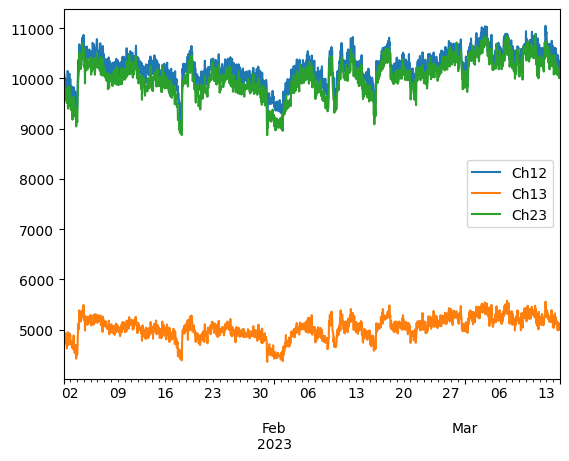

In [72]:
df_atlanta['ratio_1_2_1_3'] = df_atlanta['Ch12'] / df_atlanta['Ch13']
df_atlanta['ratio_1_3_2_3'] = df_atlanta['Ch13'] / df_atlanta['Ch23']
df_atlanta['ratio_1_2_2_3'] = df_atlanta['Ch12'] / df_atlanta['Ch23']
df_atlanta['Ch12'] = df_atlanta['Ch12'] / df_atlanta['Ch12'].mean()

df_atlanta['Ch12'].plot()
df_atlanta['Ch13'].plot()
df_atlanta['Ch23'].plot()
plt.legend()
plt.show()


In [65]:
df_morning = pd.read_csv('cube_run_morning_combined.csv')
df_morning.index = pd.to_datetime(df_morning['timestamp'])
df_morning.drop(columns=['timestamp'], inplace=True)
df_morning.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Latitude,Longitude,Altitude (m),index,Temperature,Relative Pressure,Humidity,Ultra-Violet Radiation Index,Solar Radiation (W/m^2),Absolute Pressure
timestamp,,,,,,,,,,,,,
2023-03-18 11:08:00,15.0,11.0,30.0,33.751984,-84.378320,305.101994,441.0,43.20,30.12,50.0,4.0,447.60,28.98
2023-03-18 11:09:00,16.0,12.0,21.0,33.751982,-84.378330,305.279351,441.0,43.20,30.12,50.0,4.0,447.60,28.98
2023-03-18 11:10:00,19.0,12.0,27.0,33.751242,-84.377937,305.846874,441.0,43.20,30.12,50.0,4.0,447.60,28.98
2023-03-18 11:11:00,16.0,17.0,26.0,33.750882,-84.376687,305.693314,440.8,43.48,30.12,48.8,4.0,451.86,28.98
2023-03-18 11:12:00,25.0,19.0,28.0,33.748431,-84.376664,314.319110,440.6,43.76,30.12,47.6,4.0,456.12,28.98


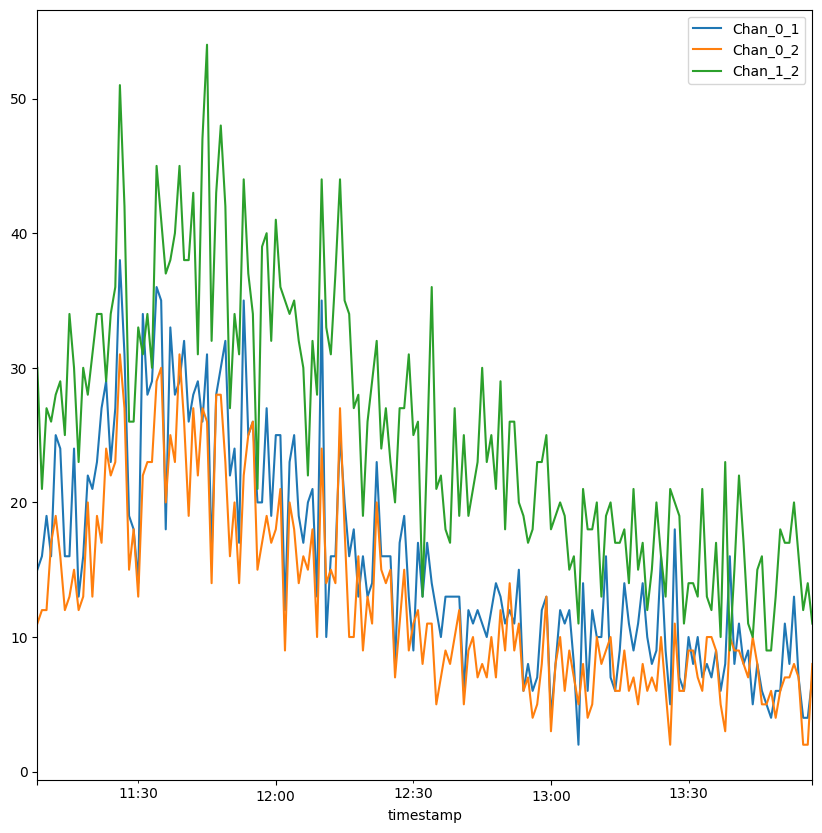

In [66]:
df_morning['ratio_1_2_1_3'] = df_morning['Chan_0_1'] / df_morning['Chan_0_2']
df_morning['ratio_1_3_2_3'] = df_morning['Chan_0_2'] / df_morning['Chan_1_2']
df_morning['ratio_1_2_2_3'] = df_morning['Chan_0_1'] / df_morning['Chan_1_2']
figure3 = plt.figure(figsize=(10, 10))
df_morning['Chan_0_1'].plot()
df_morning['Chan_0_2'].plot()
df_morning['Chan_1_2'].plot()
plt.legend()
plt.show()


In [67]:
df_morning = pd.read_csv('cube_run_evening_combined.csv')
df_morning.index = pd.to_datetime(df_morning['timestamp'])
df_morning.drop(columns=['timestamp'], inplace=True)
df_morning.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Latitude,Longitude,Altitude (m),index,Temperature,Relative Pressure,Humidity,Ultra-Violet Radiation Index,Solar Radiation (W/m^2),Absolute Pressure
timestamp,,,,,,,,,,,,,
2023-03-18 19:44:00,21.0,17.0,24.0,33.755906,-84.387874,346.900284,338.0,48.7,30.12,35.0,0.0,0.80,28.98
2023-03-18 19:45:00,18.0,20.0,28.0,33.751984,-84.378474,304.837447,338.0,48.7,30.12,35.0,0.0,0.80,28.98
2023-03-18 19:46:00,19.0,22.0,29.0,33.751303,-84.379240,305.408028,337.8,48.7,30.12,35.0,0.0,0.64,28.98
2023-03-18 19:47:00,19.0,13.0,26.0,33.750129,-84.379599,312.089753,337.6,48.7,30.12,35.0,0.0,0.48,28.98
2023-03-18 19:48:00,20.0,13.0,33.0,33.749779,-84.379577,313.158915,337.4,48.7,30.12,35.0,0.0,0.32,28.98


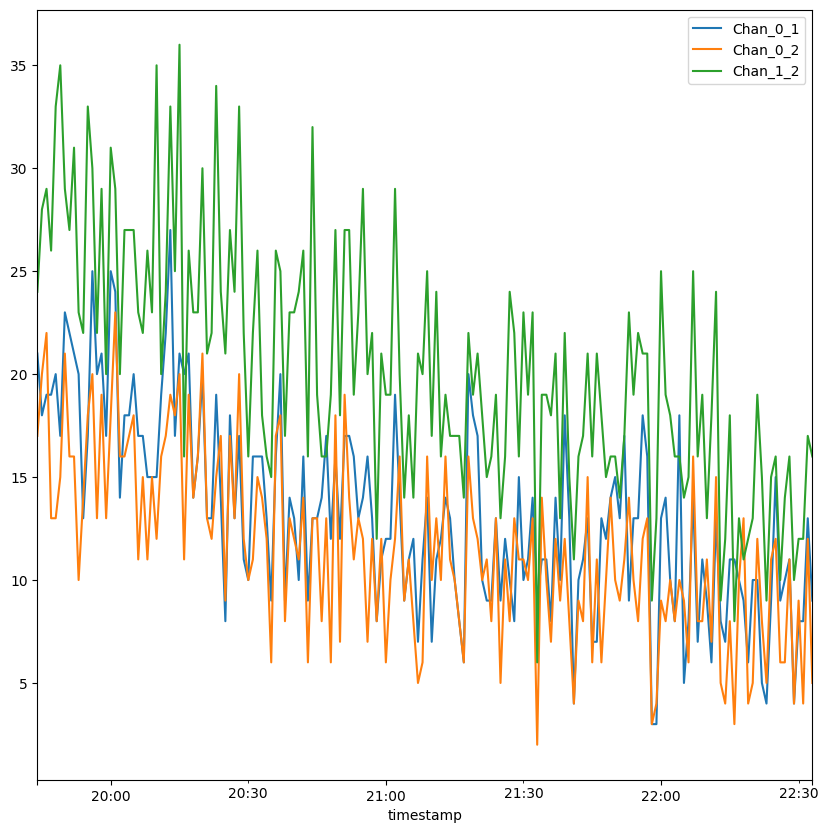

In [68]:
df_morning['ratio_1_2_1_3'] = df_morning['Chan_0_1'] / df_morning['Chan_0_2']
df_morning['ratio_1_3_2_3'] = df_morning['Chan_0_2'] / df_morning['Chan_1_2']
df_morning['ratio_1_2_2_3'] = df_morning['Chan_0_1'] / df_morning['Chan_1_2']
figure3 = plt.figure(figsize=(10, 10))
df_morning['Chan_0_1'].plot()
df_morning['Chan_0_2'].plot()
df_morning['Chan_1_2'].plot()
plt.legend()
plt.show()


In [55]:
df_morning = pd.read_csv('data_collection_2023.csv')
df_morning['timestamp'] = pd.to_datetime(df_morning['timestamp'])
df_morning.dropna(inplace=True)
df_morning.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,14,10,10,2023-02-08 14:04:10
1,16,13,19,2023-02-08 14:05:10
2,13,18,15,2023-02-08 14:06:10
3,15,16,13,2023-02-08 14:07:10
4,10,11,13,2023-02-08 14:08:10


In [56]:
df_morning = df_morning.resample('H', on = 'timestamp', axis=0).mean()
df_morning.dropna(inplace=True)
df_morning.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-02-08 14:00:00,12.392857,10.892857,13.000000
2023-02-08 15:00:00,13.478261,11.043478,13.347826
2023-02-08 16:00:00,16.333333,13.454545,14.878788
2023-02-08 18:00:00,16.333333,14.500000,17.333333
2023-02-08 19:00:00,47.411765,43.647059,30.235294


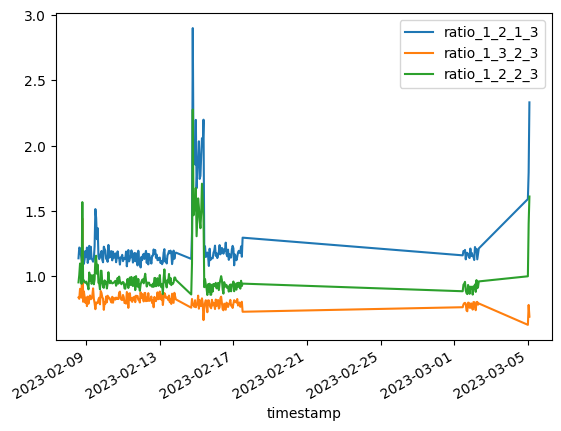

In [57]:
df_morning['ratio_1_2_1_3'] = df_morning['Chan_0_1'] / df_morning['Chan_0_2']
df_morning['ratio_1_3_2_3'] = df_morning['Chan_0_2'] / df_morning['Chan_1_2']
df_morning['ratio_1_2_2_3'] = df_morning['Chan_0_1'] / df_morning['Chan_1_2']
df_morning['ratio_1_2_1_3'].plot()
df_morning['ratio_1_3_2_3'].plot()
df_morning['ratio_1_2_2_3'].plot()
plt.legend()
plt.show()

In [58]:
df_morning = pd.read_csv('data_collection_feb_march.csv')
df_morning['timestamp'] = pd.to_datetime(df_morning['timestamp'])
df_morning.dropna(inplace=True)
df_morning.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,271,757,294,2023-02-08 15:13:44
1,9,9,14,2023-02-08 15:14:44
2,12,14,11,2023-02-08 15:15:44
3,13,8,13,2023-02-08 15:16:44
4,19,12,18,2023-02-08 15:17:44


In [59]:
df_morning = df_morning.resample('H', on = 'timestamp', axis=0).mean()
df_morning.dropna(inplace=True)
df_morning.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-02-08 15:00:00,21.178571,36.821429,23.071429
2023-02-08 16:00:00,47.666667,114.666667,43.666667
2023-02-08 17:00:00,16.293103,18.551724,16.827586
2023-02-08 18:00:00,44.902439,59.195122,53.292683
2023-02-08 19:00:00,49.531250,45.718750,31.281250


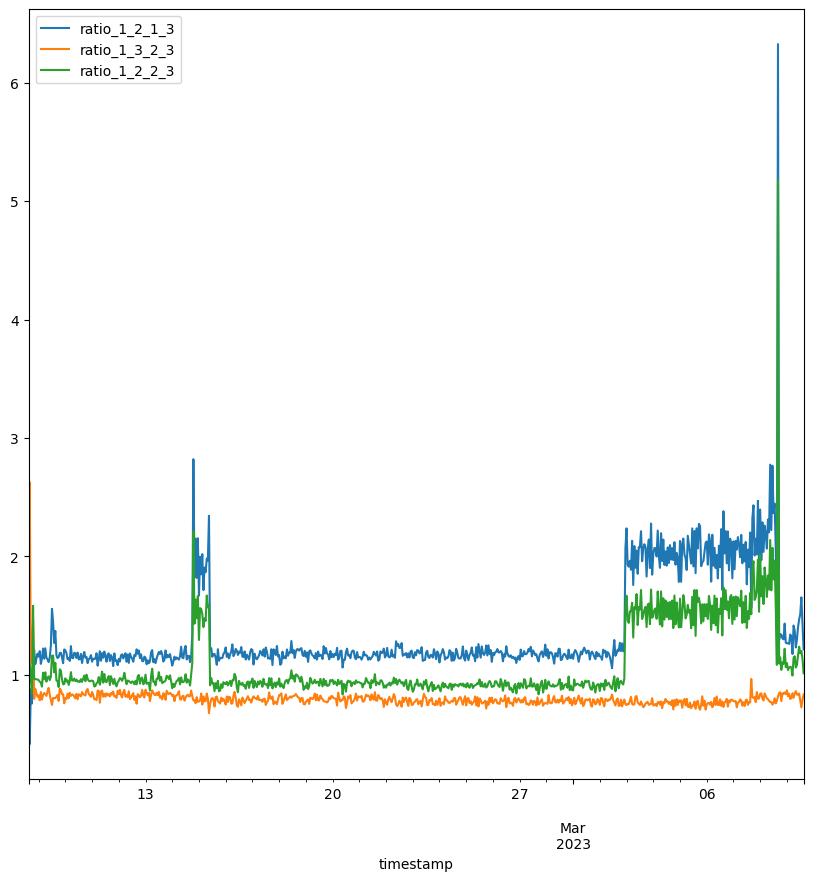

In [60]:
df_morning['ratio_1_2_1_3'] = df_morning['Chan_0_1'] / df_morning['Chan_0_2']
df_morning['ratio_1_3_2_3'] = df_morning['Chan_0_2'] / df_morning['Chan_1_2']
df_morning['ratio_1_2_2_3'] = df_morning['Chan_0_1'] / df_morning['Chan_1_2']
figure4 = plt.figure(figsize=(10, 10))
df_morning['ratio_1_2_1_3'].plot()
df_morning['ratio_1_3_2_3'].plot()
df_morning['ratio_1_2_2_3'].plot()
plt.legend()
plt.show()

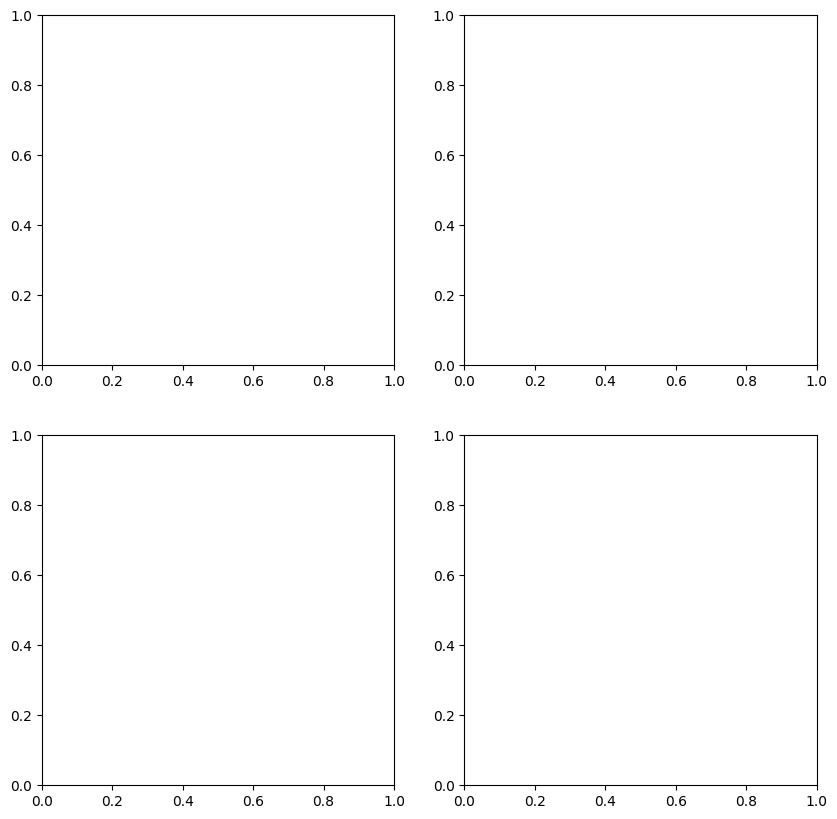

In [61]:
figure5, ax1 = plt.subplots(2,2, figsize=(10,10))
ax1[0,0]=figure

ax1[0,1]=figure2
ax1[1,0]=figure3
ax1[1,1]=figure4


In [62]:
df_atlanta = pd.read_csv('data_collection_feb_march.csv')

In [63]:
df_atlanta['timestamp'] = pd.to_datetime(df_atlanta['timestamp'])
df_atlanta.dropna(inplace=True)
df_atlanta.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,271,757,294,2023-02-08 15:13:44
1,9,9,14,2023-02-08 15:14:44
2,12,14,11,2023-02-08 15:15:44
3,13,8,13,2023-02-08 15:16:44
4,19,12,18,2023-02-08 15:17:44


In [ ]:
df_atlanta = df_atlanta.resample('H', on = 'timestamp', axis=0).mean()
df_atlanta['average'] = df_atlanta.mean(axis=1)